In [10]:
import sys        
sys.path.append('/Example/File/Location') 
# Location of the common_functions and Clustering

import common_functions as cf
import Clustering as Cluster

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')
from matplotlib.colors import ListedColormap

In [3]:
# Import data (needs to be txt and match Renishaw export format)
# Extract wavelengths (w) and the data matrix (data)

name = 'Example_name.txt'
w = cf.one_variable(name).waves()
data = cf.one_variable(name).DataMat()

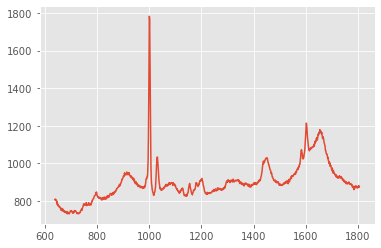

In [4]:
# Check each the rows are spectra

plt.plot(w[::-1],data[15][::-1])
plt.show()

In [5]:
# Create colormap

cmap_KM = ListedColormap(["blue", "red", "green", "yellow","orange"])

In [11]:
# Create k-smeans image using Cluster

df = Cluster.Kmeans_cluster_VRI(name, data, 5)

/tmp/ipykernel_92167/1666800884.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


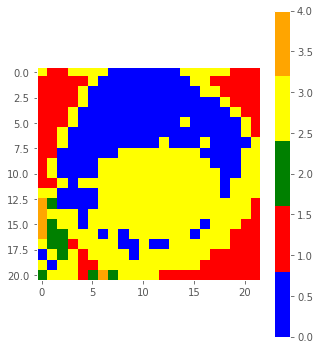

In [12]:
# Plot k-means image

plt.figure(figsize=(5,6))
plt.imshow(df,cmap_KM)
plt.grid(False)
plt.colorbar()
plt.show()

In [13]:
# Assign k-means labels to the dataset

labels = Cluster.Kmeans_labels(data, 5).rename(columns={0:'Labels'})
spectra = pd.DataFrame(data)
X = pd.concat([labels,spectra],axis=1).set_index('Labels')

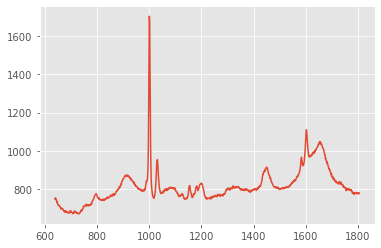

In [14]:
# Inspect the mean averaged spectrum for desired cluster
# To check 

i = 1
plt.plot(w,np.array(X.loc[i].mean()))

In [15]:
# Make dataset from selected clusters

d0 = X.loc[0]
d2 = X.loc[2]
d3 = X.loc[3]
d4 = X.loc[4]


fdf = pd.concat([d0,d2,d3,d4],axis=0)
data2 = np.array(fdf)[::-1]

In [16]:
# Select three unique index numbers from the range 
# Only repeat if there are two the same

import random as rand
n_1, n_2, n_3 = rand.randrange(len(data2)), rand.randrange(len(data2)), rand.randrange(len(data2))
print(n_1)
print(n_2)
print(n_3)

263
154
151


In [17]:
# Select the three random samples, average two of them and average the entire dataset


d_1 = data2[n_1,::-1]
d_2 = data2[n_2,::-1]
data_1 = pd.DataFrame(data2[n_1,::-1])
data_2 = pd.DataFrame(data2[n_2,::-1])
data_3 = pd.DataFrame(data2[n_3,::-1])
data_4 = pd.DataFrame([d_1, d_2]).mean()

d_5 = pd.DataFrame(data2).mean()
d_5_2 = np.array(d_5)[::-1]
data_5 = pd.DataFrame(d_5_2)

In [18]:
data_5.shape

(1015, 1)

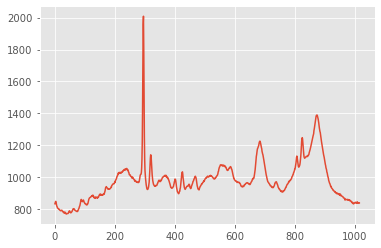

In [19]:
# check the averaged spectrum for the entire dataset
plt.plot(data_5)

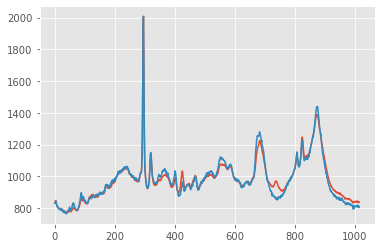

In [20]:
# Compare the spectrum for the averged dataset and a randomly selected spectrum
plt.figure()
plt.plot(data_5)
plt.plot(data_1)

In [21]:
# combine all into a single dataframe 
df = pd.concat([data_1,data_2,data_3,data_4,data_5],axis=1).T.reset_index(drop=True)

In [22]:
df.shape

(5, 1015)

In [23]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014
0,829.783752,836.041382,839.186829,844.310852,833.917419,824.207397,819.452393,810.913635,812.828735,803.131531,...,808.645752,812.704468,817.643555,807.87915,814.392578,808.900818,817.986572,803.847534,802.850769,806.696594
1,791.523621,800.431641,812.016663,815.954407,803.245300,792.008972,781.681580,769.717896,769.784790,765.765625,...,744.864929,744.869751,751.139099,747.57373,742.911560,741.123169,738.278564,736.334106,742.486328,742.009705


In [24]:
len(df)

5

In [25]:
# Make labels for the image/class you are analysing
labels = []
for i in range(0,len(df)):
    labels.append('SmSq')

lbs = pd.DataFrame(labels).rename(columns={0:'Labels'})

In [26]:
lbs

,Labels
0,SmSq
1,SmSq
2,SmSq
3,SmSq
4,SmSq


In [27]:
df.shape

(5, 1015)

In [28]:
# concat the labels and the selected spectra
DataFrame = pd.concat([lbs,df],axis=1)

In [29]:
DataFrame

,Labels,0,1,2,3,4,5,6,7,8,...,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014
0,SmSq,829.783752,836.041382,839.186829,844.310852,833.917419,824.207397,819.452393,810.913635,812.828735,...,808.645752,812.704468,817.643555,807.879150,814.392578,808.900818,817.986572,803.847534,802.850769,806.696594
1,SmSq,791.523621,800.431641,812.016663,815.954407,803.245300,792.008972,781.681580,769.717896,769.784790,...,744.864929,744.869751,751.139099,747.573730,742.911560,741.123169,738.278564,736.334106,742.486328,742.009705
2,SmSq,802.036865,811.108215,822.397217,826.527222,811.458801,801.131226,795.936096,777.219666,782.476685,...,760.388245,762.111816,766.265320,760.951477,760.688660,753.167725,756.856995,748.544006,757.648071,757.880615
3,SmSq,810.653687,818.236512,825.601746,830.132629,818.581359,808.108184,800.566986,790.315765,791.306763,...,776.755340,778.787110,784.391327,777.726440,778.652069,775.011994,778.132568,770.090820,772.668549,774.353149
4,SmSq,833.042136,839.062149,845.382756,847.961264,840.088561,830.613458,818.944345,816.651306,810.354166,...,837.245623,837.705004,845.473504,839.573685,837.823488,839.338837,839.902109,837.957582,835.635638,837.705921


In [34]:
# Save the final dataframe 
DataFrame.to_csv(name+' DataFrame.csv')